___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [148]:
df = pd.read_csv("Churn_Modelling.csv")

In [149]:
from matplotlib import style
style.use('dark_background')

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [150]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6419,6420,15767804,Feng,729,France,Male,44,6,0.000,2,1,0,151733.430,0
8072,8073,15661473,Boni,780,Germany,Male,51,4,126725.250,1,1,0,195259.310,1
8305,8306,15605698,Harrison,746,France,Male,58,3,0.000,3,1,1,80344.960,1
2487,2488,15651140,Doherty,710,France,Female,32,3,0.000,1,1,0,94790.340,0
1084,1085,15591257,Ejimofor,796,France,Male,24,8,0.000,2,1,0,61349.370,0


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [152]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [153]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000
mean,5000.500,15690940.569,650.529,38.922,5.013,76485.889,1.530,0.706,0.515,100090.240,0.204
std,2886.896,71936.186,96.653,10.488,2.892,62397.405,0.582,0.456,0.500,57510.493,0.403
min,1.000,15565701.000,350.000,18.000,0.000,0.000,1.000,0.000,0.000,11.580,0.000
25%,2500.750,15628528.250,584.000,32.000,3.000,0.000,1.000,0.000,0.000,51002.110,0.000
50%,5000.500,15690738.000,652.000,37.000,5.000,97198.540,1.000,1.000,1.000,100193.915,0.000
75%,7500.250,15753233.750,718.000,44.000,7.000,127644.240,2.000,1.000,1.000,149388.247,0.000
max,10000.000,15815690.000,850.000,92.000,10.000,250898.090,4.000,1.000,1.000,199992.480,1.000


In [154]:
df.sample()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6406,6407,15637118,Burns,684,France,Male,33,4,140700.610,1,1,0,103557.930,0


In [155]:
df.drop(["RowNumber","Surname"],axis=1,inplace=True)

In [156]:
df.sample()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5358,15796958,658,France,Male,39,7,0.000,2,1,0,48378.400,0


In [157]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

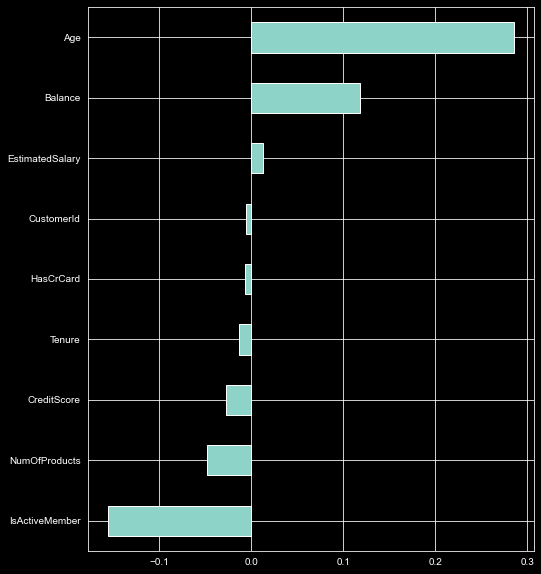

In [158]:
plt.figure(figsize = (8,10))
df.corr()["Exited"].sort_values().drop("Exited").plot(kind = "barh");

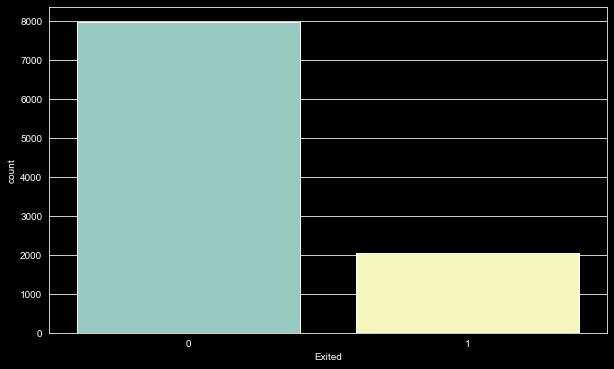

In [159]:
sns.countplot(x=df.Exited);

In [160]:
df=pd.get_dummies(data=df,prefix_sep="_")
df.drop("Gender_Male",axis=1,inplace=True)

In [161]:
df.sample(3)

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female
2352,15726791,637,45,2,157929.450,1,1,1,145134.490,1,0,0,1,1
6116,15611644,627,73,0,146329.730,1,0,1,43615.670,0,1,0,0,0
5842,15799128,608,38,9,102406.760,1,0,1,57600.660,0,0,0,1,1


In [162]:
df.set_index("CustomerId",inplace=True)

#### Latest Data

In [163]:
df.sample(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female
CustomerId,,,,,,,,,,,,,
15667265,729,39,4,121404.640,1,1,1,159618.170,0,1,0,0,0
15769902,679,33,6,0.000,2,1,1,98015.850,0,1,0,0,1
15591135,726,37,2,132057.920,2,1,0,34743.980,0,1,0,0,0


# Preprocessing of Data
- Train | Test Split, Scalling

In [164]:
from sklearn.model_selection import train_test_split

In [165]:
X = df.drop('Exited', axis = 1)
y = df['Exited']

In [166]:
seed=42

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=seed)

In [168]:
from sklearn.preprocessing import MinMaxScaler  # RobustScaler()

# If there are too many outliers in the data, robust scaler should be used, otherwise minmax can be used.

In [169]:
scaler = MinMaxScaler()

In [170]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [171]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [172]:
X_train.shape

(9000, 12)

In [173]:
X_test.shape

(1000, 12)

In [175]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["Recall"])

In [176]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 36)                468       
                                                                 
 dense_30 (Dense)            (None, 18)                666       
                                                                 
 dense_31 (Dense)            (None, 9)                 171       
                                                                 
 dense_32 (Dense)            (None, 1)                 10        
                                                                 
Total params: 1,315
Trainable params: 1,315
Non-trainable params: 0
_________________________________________________________________


In [178]:
model.fit(x = X_train, y = y_train, validation_split =0.1, batch_size = 128, epochs = 1000)

Epoch 1/1000
64/64 [==============================] - 3s 13ms/step - loss: 0.5663 - recall: 0.0156 - val_loss: 0.4882 - val_recall: 0.0000e+00
Epoch 2/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.4866 - recall: 0.0000e+00 - val_loss: 0.4600 - val_recall: 0.0000e+00
Epoch 3/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.4683 - recall: 0.0060 - val_loss: 0.4362 - val_recall: 0.0389
Epoch 4/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.4569 - recall: 0.0678 - val_loss: 0.4261 - val_recall: 0.1000
Epoch 5/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.4452 - recall: 0.1110 - val_loss: 0.4165 - val_recall: 0.1833
Epoch 6/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.4358 - recall: 0.1609 - val_loss: 0.4148 - val_recall: 0.2722
Epoch 7/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.4309 - recall: 0.1927 - val_loss: 0.4080 - val_recall: 0.2222
Epoch 8/1000
64/64 [=

In [ ]:
model.weights

In [ ]:
model.weights

In [179]:
pd.DataFrame(model.history.history)

,loss,recall,val_loss,val_recall
0,0.566,0.016,0.488,0.000
1,0.487,0.000,0.460,0.000
2,0.468,0.006,0.436,0.039
3,0.457,0.068,0.426,0.100
4,0.445,0.111,0.416,0.183
...,...,...,...,...
995,0.272,0.604,0.402,0.478
996,0.271,0.600,0.402,0.511
997,0.280,0.601,0.399,0.444
998,0.274,0.606,0.404,0.483


<AxesSubplot:>

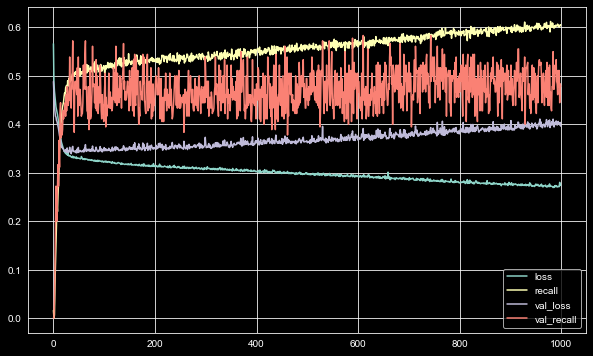

In [180]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [181]:
model.evaluate(X_test, y_test, verbose=0)

[0.3908361494541168, 0.4712041914463043]

In [182]:
y_pred = model.predict(X_test)

32/32 [==============================] - 0s 2ms/step


In [183]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("Recall : ", recall )

loss :  0.3908361494541168
Recall :  0.4712041914463043


In [184]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[755  54]
 [101  90]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.91       809
           1       0.62      0.47      0.54       191

    accuracy                           0.84      1000
   macro avg       0.75      0.70      0.72      1000
weighted avg       0.83      0.84      0.84      1000



### with class_weight


In [ ]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)
class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

In [ ]:
model.summary

In [ ]:
model.weights

In [ ]:
model.fit(x = X_train, y = y_train, validation_data=(X_test,y_test), batch_size = 128, epochs = 500)

In [ ]:
pd.DataFrame(model.history.history)

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
model.evaluate(X_test, y_test, verbose=0)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("Recall : ", recall )

In [ ]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [208]:
from tensorflow.keras.callbacks import EarlyStopping

In [209]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(24, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(24, activation = "relu"))
model.add(Dense(10, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["Recall"])

In [210]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [211]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
254/254 [==============================] - 4s 5ms/step - loss: 0.5096 - recall: 0.0024 - val_loss: 0.4520 - val_recall: 0.0000e+00
Epoch 2/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.4660 - recall: 0.0408 - val_loss: 0.4343 - val_recall: 0.1111
Epoch 3/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.4454 - recall: 0.1381 - val_loss: 0.4154 - val_recall: 0.2944
Epoch 4/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.4260 - recall: 0.2359 - val_loss: 0.4046 - val_recall: 0.3278
Epoch 5/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.4107 - recall: 0.2707 - val_loss: 0.3962 - val_recall: 0.2556
Epoch 6/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.3985 - recall: 0.2989 - val_loss: 0.3889 - val_recall: 0.2944
Epoch 7/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.3895 - recall: 0.3301 - val_loss: 0.3820 - val_recall: 0.3167
Epoch 8/1000
254

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [ ]:
loss, Recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("Recall : ", Recall)

In [ ]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(24, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.5))

model.add(Dense(24, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(10, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [ ]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 128, epochs = 1000, verbose = 1)

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

In [ ]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
def build_classifier():
    tf.random.set_seed(seed)
    classifier = Sequential()
    classifier.add(Dense(units = 36, activation = 'relu'))
    classifier.add(Dense(units = 18, activation = 'relu'))
    classifier.add(Dense(units = 9, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = "adam", loss = 'binary_crossentropy', metrics = ['Recall'])
    return classifier

In [ ]:
classifier_model = KerasClassifier(build_fn = build_classifier, batch_size = 32, epochs = 100, verbose=0)

scores = cross_validate(estimator = classifier_model, X = X_train, y = y_train,
                        scoring = ['accuracy', 'precision', 'recall', 'f1'], cv = 10)

df_scores = pd.DataFrame(scores, index = range(1, 11)).iloc[:, 2:]

df_scores

In [ ]:
df_scores_summary = pd.DataFrame({"score_mean" : df_scores.mean().values, "score_std" : df_scores.std().values},
                                 index = ["acc", "pre", "rec", "f1"])

df_scores_summary

In [ ]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam

In [ ]:
def build_classifier(optimizer, learn_rate):
    tf.random.set_seed(seed)
    classifier = Sequential()
    classifier.add(Dense(units = 36, activation = 'relu'))
    classifier.add(Dense(units = 18, activation = 'relu'))
    classifier.add(Dense(units = 9, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ['Recall'])
    return classifier

In [ ]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [ ]:
classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.1, epochs = 200)

parameters = {'batch_size': [32, 64],
              'optimizer': [Adam, RMSprop, Adadelta, Nadam],
              'learn_rate': [0.001, 0.003, 0.005]}

grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'Recall',
                          cv = 10,
                          n_jobs = -1,
                          verbose = 1)

grid_model.fit(X_train, y_train, callbacks = [early_stop])

In [ ]:
grid_model.best_score_

In [ ]:
grid_model.best_params_

In [ ]:
grid_result = pd.DataFrame(grid_model.cv_results_)[["mean_test_score", "std_test_score", "rank_test_score", "params"]].sort_values(by="rank_test_score")
grid_result

In [ ]:
y_pred = grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred)

In [ ]:
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred_proba)

In [ ]:
y_pred_proba = grid_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred_proba)

# Final Model and Model Deployment

## Prediction

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___